In [20]:
import cv2
import numpy
import matplotlib.pyplot as plt
import datetime

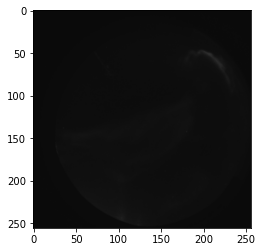

In [33]:
image_path = '/Volumes/Garrys_T7/rtroyer-useful-functions/image/rank/tmp/2020-01-04/decompressed/rank20200104074248.pgm'
img= cv2.imread(image_path, 0)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

0.005349


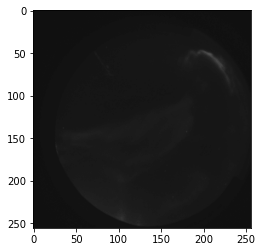

In [34]:
def _relu(image_path, low = 0, pivot=0.02, ratio=1.7):
    tic = datetime.datetime.now()
    image = cv2.imread(image_path, 0)

    # process the data in relu
    def _relu_help(data, pivot=pivot, low=low, ratio=ratio):
        return numpy.maximum(data+low, ratio*(data-pivot)+low)

    image = _relu_help(image)
    image = image.clip(low, 255).astype(numpy.uint8)
    toc = datetime.datetime.now()
    print(str((toc-tic).total_seconds()))
    return image

relu_img = _relu(image_path)
plt.imshow(relu_img, cmap='gray', vmin=0, vmax=255)
plt.show()

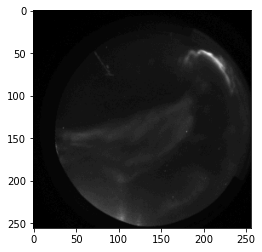

In [36]:
def _bytescale(data, cmin=None, cmax=None, high=65535, low=0):
    if high > 65535:
        raise ValueError("`high` should be less than or equal to 65535.")
    if low < 0:
        raise ValueError("`low` should be greater than or equal to 0.")
    if high < low:
        raise ValueError(
            "`high` should be greater than or equal to `low`.")

    if cmin is None:
        cmin = data.min()
    if cmax is None:
        cmax = data.max()

    cscale = cmax - cmin
    if cscale < 0:
        raise ValueError("`cmax` should be larger than `cmin`.")
    elif cscale == 0:
        cscale = 1

    scale = float(high - low) / cscale
    bytedata = (data - cmin) * scale + low
    return (bytedata.clip(low, high) + 0.5).astype(np.uint16)

bs_img = _bytescale(img)
bs_img = (bs_img // 256)
bs_img = np.uint8(bs_img)
plt.imshow(bs_img, cmap='gray', vmin=0, vmax=255)
plt.show()

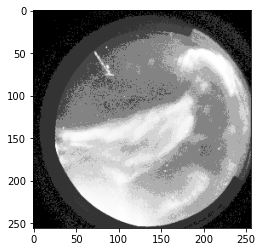

In [39]:
def _eqhist(img):
    img = cv2.equalizeHist(img) # equalize histogram
    return img

eqhist_img = _eqhist(img)
plt.imshow(eqhist_img, cmap='gray', vmin=0, vmax=255)
plt.show()

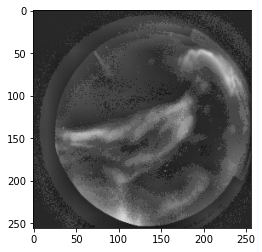

In [75]:
clahe=cv2.createCLAHE(clipLimit=30)
clahe_img=clahe.apply(img)
plt.imshow(clahe_img, cmap='gray', vmin=0, vmax=255)

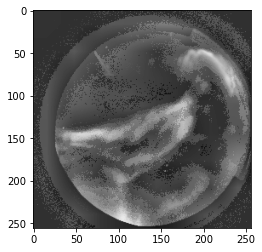

In [71]:
clahe=cv2.createCLAHE(clipLimit=40)
clahe_img=clahe.apply(img)
plt.imshow(clahe_img, cmap='gray', vmin=0, vmax=255)

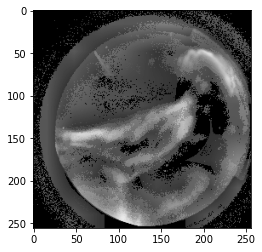

In [66]:
th=50
max_val=255
ret, o3 = cv2.threshold(clahe_img, th, max_val, cv2.THRESH_TOZERO)
plt.imshow(o3, cmap='gray', vmin=0, vmax=255)

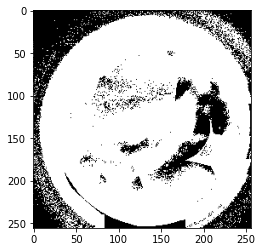

In [69]:
th=50
max_val=255
ret, o3 = cv2.threshold(clahe_img, th, max_val, cv2.THRESH_BINARY)
plt.imshow(o3, cmap='gray', vmin=0, vmax=255)